---

#<h2 style="text-align: center;"><b>Многослойная сеть на Keras</b></h3>

---

##<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

##<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

#Создание двухслойной нейросети
Cоздадим двухслойную нейросеть из 100 нейронов:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import keras

Генерация датасета:

In [3]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

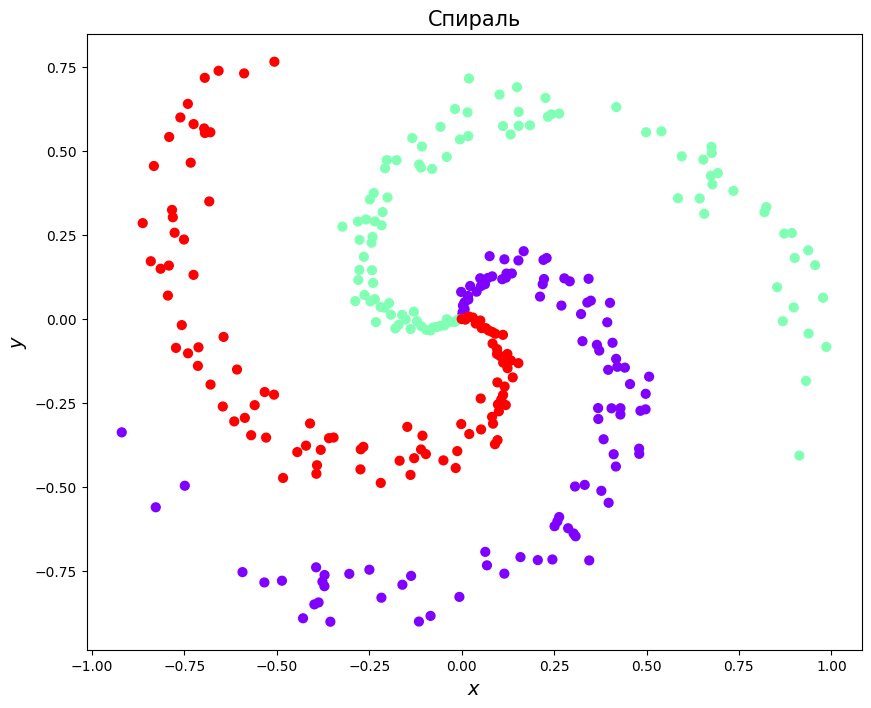

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [4]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


In [5]:
y = keras.utils.to_categorical(y, 3)


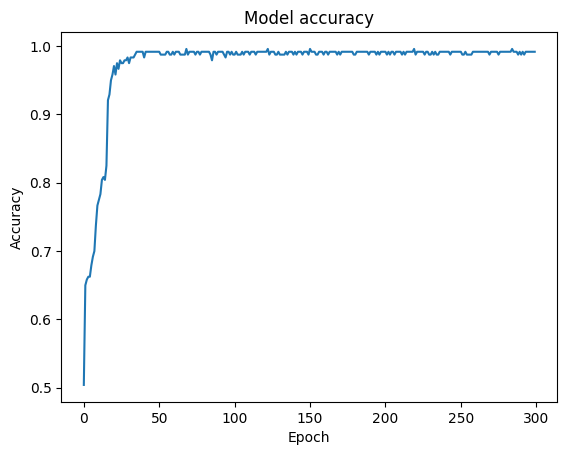

In [7]:
from keras import optimizers
many_layer_net=keras.models.Sequential()
many_layer_net.add(keras.layers.Dense(200, input_shape=(X.shape[1],), activation='relu'))
many_layer_net.add(keras.layers.Dense(150, activation='relu'))
many_layer_net.add(keras.layers.Dense(100, activation='relu'))
many_layer_net.add(keras.layers.Dense(50, activation='relu'))
many_layer_net.add(keras.layers.Dense(3, activation='softmax'))
adam = optimizers.Adam(learning_rate=0.001)
many_layer_net.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=many_layer_net.fit(X, y, epochs=300, batch_size=64, verbose=0, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


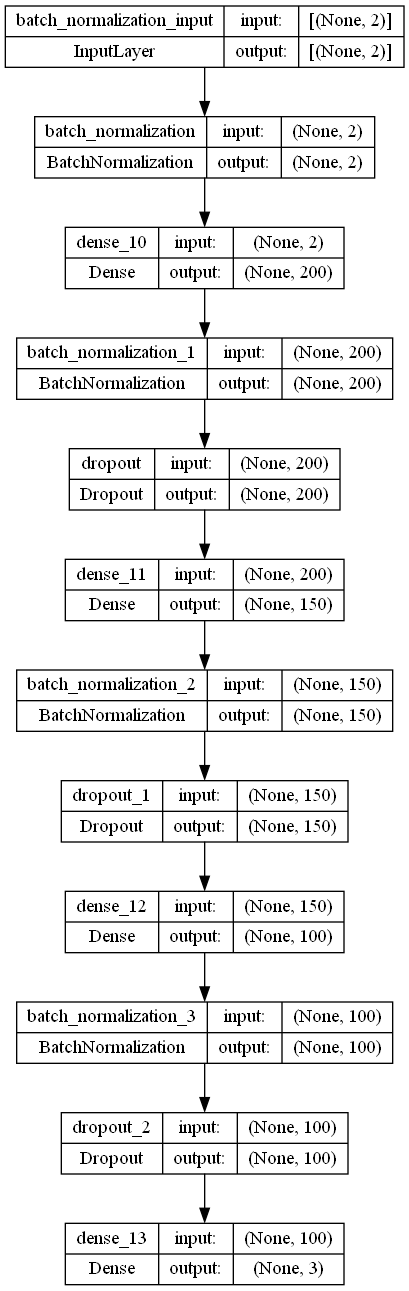

In [12]:
#визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(many_layer_net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

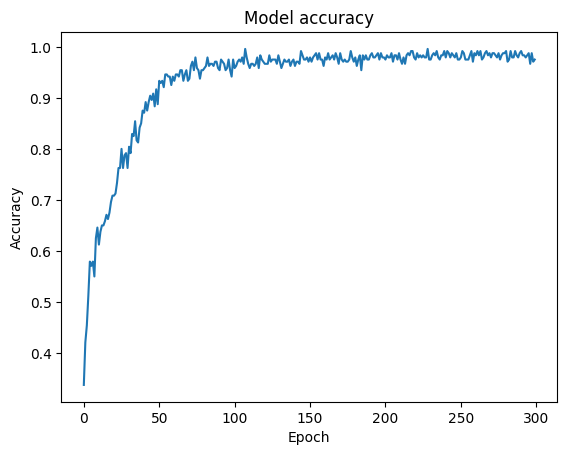

In [13]:
many_layer_net=keras.models.Sequential()
many_layer_net.add(keras.layers.Dense(200, input_shape=(X.shape[1],), activation='relu'))
many_layer_net.add(keras.layers.Dropout(0.5))
many_layer_net.add(keras.layers.Dense(150, activation='relu'))
many_layer_net.add(keras.layers.Dropout(0.5))
many_layer_net.add(keras.layers.Dense(100, activation='relu'))
many_layer_net.add(keras.layers.Dropout(0.5))
many_layer_net.add(keras.layers.Dense(50, activation='relu'))
many_layer_net.add(keras.layers.Dropout(0.5))
many_layer_net.add(keras.layers.Dense(3, activation='softmax'))
adam = optimizers.Adam(lr=0.001)
many_layer_net.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=many_layer_net.fit(X, y, epochs=300, batch_size=64, verbose=0, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#Создание многослойной нейросети
Усложним архитектуру нейронной сети прямого распрастронения:

In [14]:
many_layer_net=keras.models.Sequential()
many_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
many_layer_net.add(keras.layers.Dense(100, activation='relu'))
many_layer_net.add(keras.layers.Dense(100, activation='relu'))
many_layer_net.add(keras.layers.Dense(3, activation='softmax'))
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.001)
many_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=many_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=0, validation_split=0.2)


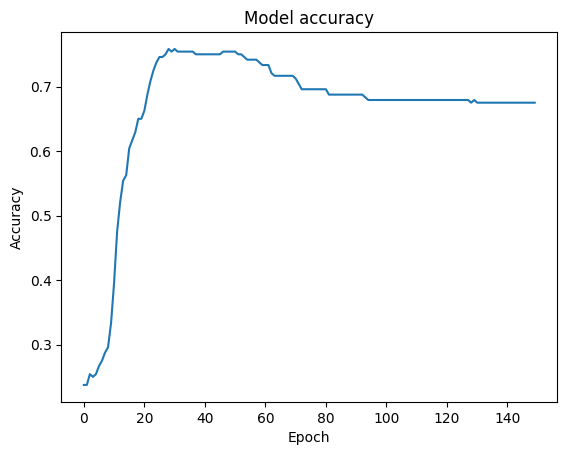

In [15]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [73]:
X.shape

(300, 2)

Epoch 1/200
4/4 [==============================] - 1s 82ms/step - loss: 1.4343 - accuracy: 0.1958 - val_loss: 1.1273 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 1.4136 - accuracy: 0.2208 - val_loss: 1.1269 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 1.4417 - accuracy: 0.2542 - val_loss: 1.1281 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 13ms/step - loss: 1.3854 - accuracy: 0.2708 - val_loss: 1.1269 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 1.3704 - accuracy: 0.2708 - val_loss: 1.1260 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 1.3515 - accuracy: 0.2875 - val_loss: 1.1248 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 1.2795 - accuracy: 0.3125 - val_loss: 1.1254 - val_accuracy: 0.0

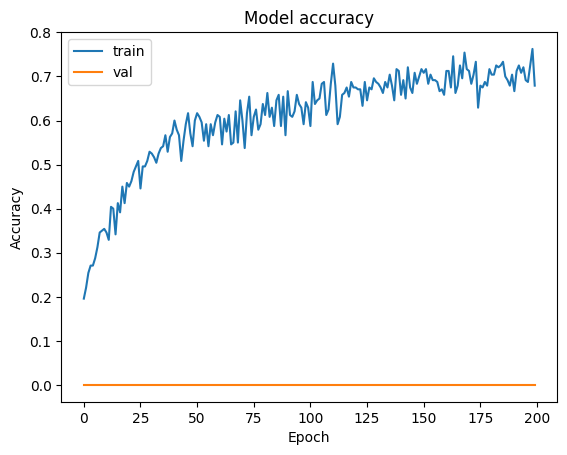

In [72]:
many_layer_net=keras.models.Sequential()

many_layer_net.add(keras.layers.Dense(30, input_shape = (X.shape[1],), activation='relu'))
many_layer_net.add(keras.layers.BatchNormalization())
many_layer_net.add(keras.layers.Dense(6, activation='relu'))
many_layer_net.add(keras.layers.Dense(6, activation='relu'))
many_layer_net.add(keras.layers.BatchNormalization())
many_layer_net.add(keras.layers.Dropout(0.5))
many_layer_net.add(keras.layers.Dense(3, activation='softmax'))
sgd = optimizers.SGD(decay=1e-6, momentum=0.5, nesterov=True, learning_rate=0.001)
many_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=many_layer_net.fit(X, y, epochs=900, batch_size=64, verbose=1, validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


#Задание 1
1. Попробовать улучшить результат за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представить в виде графиков (диаграмм)
2. Добавить слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотреть как измениться результат
3. Добавить слой нормализации (keras.layers.BatchNormalization) и оценить его влияние на качество обучения.  

#Создание многослойной нейросети для классификации рукописных цифр

In [17]:
import keras

from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.utils import np_utils
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

number_of_classes = 10

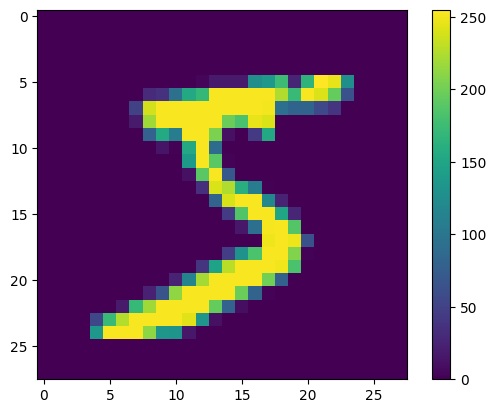

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)


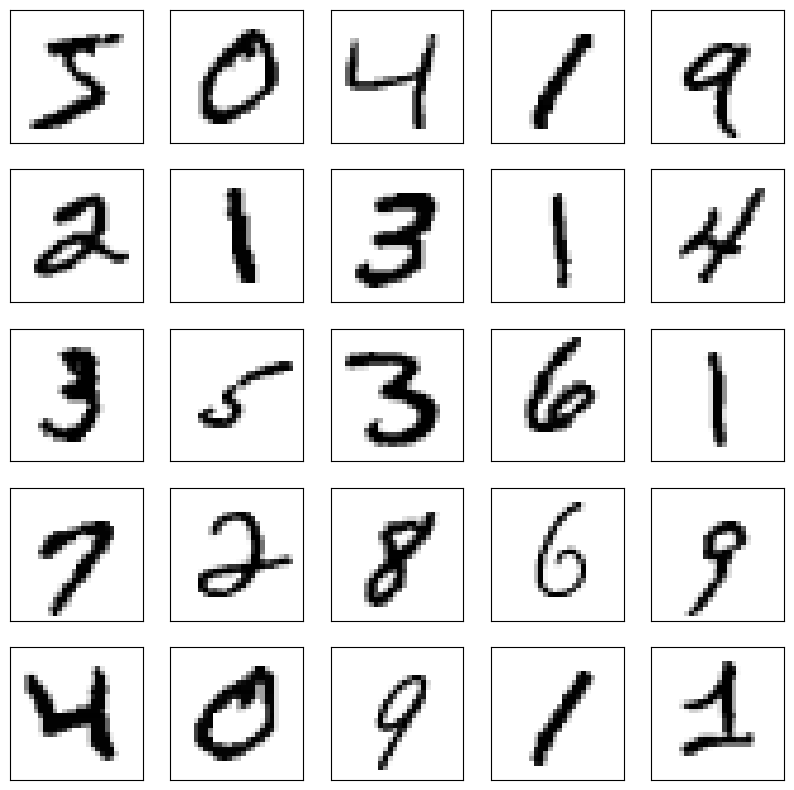

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')

#для преобразования двумерных данных в одномерные в нейронной сети можно использовать слой Flatten(input_shape=(28,28))

X_train/=255
X_test/=255

y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [21]:
X_train.shape

(60000, 784)

In [22]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5)) # добавляем слой Dropout
model.add(Dense(number_of_classes, activation='softmax'))
print(model.summary())




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3671 - accuracy: 0.8933 - val_loss: 0.1663 - val_accuracy: 0.9520
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.1733 - accuracy: 0.9497 - val_loss: 0.1204 - val_accuracy: 0.9634
Epoch 3/5
300/300 [==============================] - 3s 9ms/step - loss: 0.1294 - accuracy: 0.9614 - val_loss: 0.0908 - val_accuracy: 0.9732
Epoch 4/5
300/300 [==============================] - 3s 9ms/step - loss: 0.1045 - accuracy: 0.9689 - val_loss: 0.0792 - val_accuracy: 0.9756
Epoch 5/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0883 - accuracy: 0.9738 - val_loss: 0.0728 - val_accuracy: 0.9784


In [24]:
#оценка точности
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


313/313 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9784
Test accuracy: 0.9783999919891357
Test loss: 0.07281223684549332


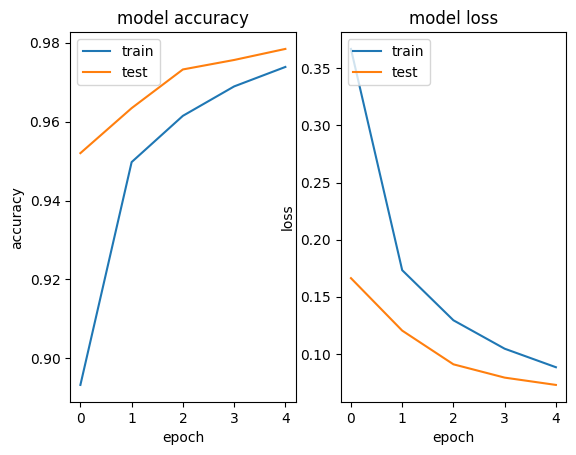

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set(title='model accuracy')
ax1.set(ylabel='accuracy')
ax1.set(xlabel='epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set(title='model loss')
ax2.set(ylabel='loss')
ax2.set(xlabel='epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()


##Задание 2
1. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.5)), переобучить модель, оценить качество обучения. 
Объяснить полученные результаты
2. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели. 

In [46]:
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='he_uniform'))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

In [26]:
from keras.regularizers import l2
l2_lambda = 0.0001
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu',kernel_initializer='he_uniform', bias_regularizer=l2(l2_lambda)))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

In [27]:
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 3s 9ms/step - loss: 0.2987 - accuracy: 0.9169 - val_loss: 0.1470 - val_accuracy: 0.9579
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.1223 - accuracy: 0.9649 - val_loss: 0.1078 - val_accuracy: 0.9680
Epoch 3/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0811 - accuracy: 0.9768 - val_loss: 0.0834 - val_accuracy: 0.9756
Epoch 4/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0584 - accuracy: 0.9834 - val_loss: 0.0731 - val_accuracy: 0.9768
Epoch 5/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.0665 - val_accuracy: 0.9792


##Задание 3
Измените коэффициент регуляризации на значение 0.5; 0.01 и 1, оцените влияние значения коэффициента на точность сети

Попробуйте использовать схему регуляризации L1 (bias_regularizer=tf.keras.regularizers.l1(0.0001)), сравните точности модели при L1 и L2 регуляризации. 



##Применение обученной нейронной сети
Необходимо нарисовать цифру (например в Paint) или скачать из Интернета

1/1 [==============================] - 0s 20ms/step
[5.0955494e-03 1.7223396e-05 6.2039271e-03 4.0383723e-02 6.1112194e-04
 2.0305368e-03 5.5549197e-05 2.2729582e-04 6.6450924e-01 2.8086582e-01]


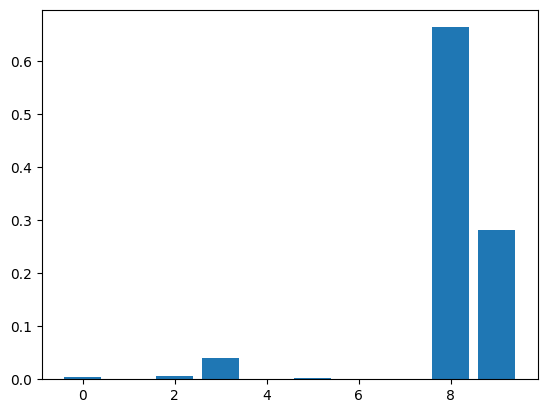

8


In [66]:
#выполняем преобразование картинки с цифрой
from PIL import Image
#преобразование входного изображения в формат набора MNIS
image=Image.open("cifra-1.png").resize((28,28))
img = np.invert(image.convert('L')).ravel()
im2arr = img.reshape(1, 28* 28).astype('float32')/255
#plt.imshow(image, cmap=plt.cm.binary)
#использование обученной модели
y_pred = model.predict(im2arr)
print(y_pred[0]) 
plt.bar(range(10), y_pred[0])
plt.show()
print(np.argmax(y_pred))

In [42]:
from keras import regularizers
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')

X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.5)))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l2_05 = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 23.9077 - accuracy: 0.3950 - val_loss: 1.9301 - val_accuracy: 0.4005
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 1.8595 - accuracy: 0.4260 - val_loss: 1.8359 - val_accuracy: 0.3712
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 1.7573 - accuracy: 0.4559 - val_loss: 1.6924 - val_accuracy: 0.4747
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.6789 - accuracy: 0.4825 - val_loss: 1.6157 - val_accuracy: 0.5167
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 1.6229 - accuracy: 0.5117 - val_loss: 1.5651 - val_accuracy: 0.5367
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 1.5722 - accuracy: 0.5487 - val_loss: 1.5247 - val_accuracy: 0.6011
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 1.4679 - accuracy: 0.6655 - val_loss: 1.3622 - val_accuracy: 0.715

In [43]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l2_001 = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 1.4065 - accuracy: 0.8892 - val_loss: 0.5483 - val_accuracy: 0.9210
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5209 - accuracy: 0.9237 - val_loss: 0.4498 - val_accuracy: 0.9361
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4632 - accuracy: 0.9324 - val_loss: 0.4312 - val_accuracy: 0.9410
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.4223 - accuracy: 0.9394 - val_loss: 0.3770 - val_accuracy: 0.9514
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.3860 - accuracy: 0.9450 - val_loss: 0.3743 - val_accuracy: 0.9427
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3666 - accuracy: 0.9478 - val_loss: 0.3372 - val_accuracy: 0.9517
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3468 - accuracy: 0.9505 - val_loss: 0.3248 - val_accuracy: 0.9546
Ep

In [55]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(1)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1)))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l2_1 = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 45.6239 - accuracy: 0.1637 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.3024 - accuracy: 0.1116 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 4s 10ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3017 - val_accuracy: 0.1028
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 2.3022 - accuracy: 0.1108 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 2.3020 - accuracy: 0.1125 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 2.3019 - accuracy: 0.1122 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 2.3014 - val_accuracy: 0.1135

In [56]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_l2_05 = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.1027 - accuracy: 0.9206 - val_loss: 0.6276 - val_accuracy: 0.9589
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5073 - accuracy: 0.9591 - val_loss: 0.3985 - val_accuracy: 0.9637
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3415 - accuracy: 0.9668 - val_loss: 0.2980 - val_accuracy: 0.9708
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2684 - accuracy: 0.9714 - val_loss: 0.2350 - val_accuracy: 0.9760
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2275 - accuracy: 0.9754 - val_loss: 0.2162 - val_accuracy: 0.9770
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2103 - accuracy: 0.9761 - val_loss: 0.2135 - val_accuracy: 0.9718
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1967 - accuracy: 0.9780 - val_loss: 0.1957 - val_accuracy: 0.9757

In [ ]:
#сохранение модели
model.save('model.h5') 

#загрузка модели
#model_load=keras.models.load_model('model.h5')

##Задание 4
Описать архитектуру многослойной нейронной сети для классификации вина (использовать датасет из scikit learn), обучить ее, проверить качество обучения, использовать для предсказания и сохранить

In [57]:
from sklearn.datasets import load_wine
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
data = load_wine()
X = data['data']
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#Define model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

#Make predictions on new data
new_data = np.array([[13.05, 1.77, 2.10, 17.0, 107.0, 3.00, 3.00, 0.28, 2.03, 5.04, 0.88, 3.35, 885.0]])
new_data = scaler.transform(new_data)
prediction = model.predict(new_data)
print(f'Prediction: {prediction}')

#Save model
#model.save('wine_classification_model.h5')

Epoch 1/50
5/5 [==============================] - 1s 53ms/step - loss: 1.1351 - accuracy: 0.2254 - val_loss: 1.1493 - val_accuracy: 0.2222
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 1.1076 - accuracy: 0.3521 - val_loss: 1.1177 - val_accuracy: 0.3611
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 1.0833 - accuracy: 0.4225 - val_loss: 1.0894 - val_accuracy: 0.3889
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 1.0602 - accuracy: 0.4437 - val_loss: 1.0654 - val_accuracy: 0.4444
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 1.0387 - accuracy: 0.4648 - val_loss: 1.0428 - val_accuracy: 0.4722
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 1.0178 - accuracy: 0.5141 - val_loss: 1.0226 - val_accuracy: 0.5278
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.9971 - accuracy: 0.5704 - val_loss: 1.0025 - val_accuracy: 0.5556
Epoch 8/50
5/5 [================

#Задание 5
Решить задачу классификации или регрессии для датасета, найденного в 1 практической работе 

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load data
data = fetch_california_housing()
X = data['data']
y = data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluate model
mse, _ = model.evaluate(X_test, y_test)
print("MSE: ", mse)

# Use model for prediction
y_pred = model.predict(X_test)

# Save model
#model.save('california_housing_model.h5')

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 0.7996 - mse: 0.7996 - val_loss: 0.4346 - val_mse: 0.4346
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3982 - mse: 0.3982 - val_loss: 0.3797 - val_mse: 0.3797
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3756 - mse: 0.3756 - val_loss: 0.3769 - val_mse: 0.3769
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3545 - mse: 0.3545 - val_loss: 0.3532 - val_mse: 0.3532
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3399 - mse: 0.3399 - val_loss: 0.3470 - val_mse: 0.3470
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3379 - mse: 0.3379 - val_loss: 0.3294 - val_mse: 0.3294
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3294 - mse: 0.3294 - val_loss: 0.3564 - val_mse: 0.3564
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - 

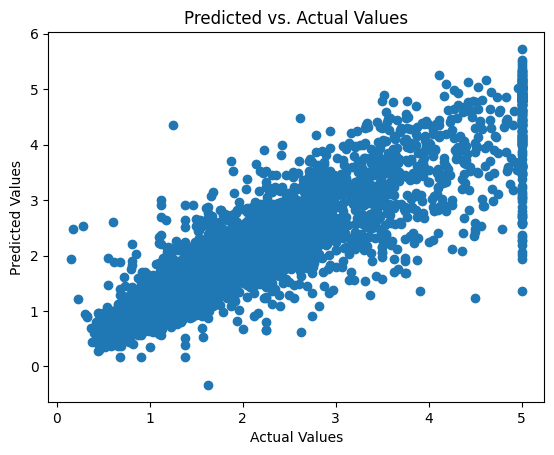

In [60]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()